In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

DATA_DIR = "../data"
IMAGES_DIR = os.path.join(DATA_DIR, "supplemental_images")
MASKS_DIR = os.path.join(DATA_DIR, "supplemental_masks")
MASK_OPACITY = 0.4

# Colors for different mask channels (RGB)
COLORS = [
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
    [255, 128, 0],  # Orange
    [128, 0, 255],  # Purple
]

def load_mask(path):
    """Load .npy mask, handle multi-channel."""
    mask = np.load(path)
    if mask.ndim == 2:
        mask = mask[None]  # (H, W) -> (1, H, W)
    elif mask.ndim == 3 and mask.shape[2] <= 8:  # (H, W, C) format
        mask = mask.transpose(2, 0, 1)  # -> (C, H, W)
    # else assume already (C, H, W)
    return mask

def overlay_masks(img, mask, opacity=0.4):
    """Overlay multi-channel mask on image with different colors."""
    img = np.array(img).astype(np.float32)
    overlay = img.copy()
    
    for ch in range(mask.shape[0]):
        m = mask[ch] > 0
        if m.any():
            color = np.array(COLORS[ch % len(COLORS)])
            overlay[m] = overlay[m] * (1 - opacity) + color * opacity
    
    return overlay.astype(np.uint8)

# Get image files
image_files = sorted([f for f in os.listdir(IMAGES_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
print(f"Found {len(image_files)} images")


Found 48 images


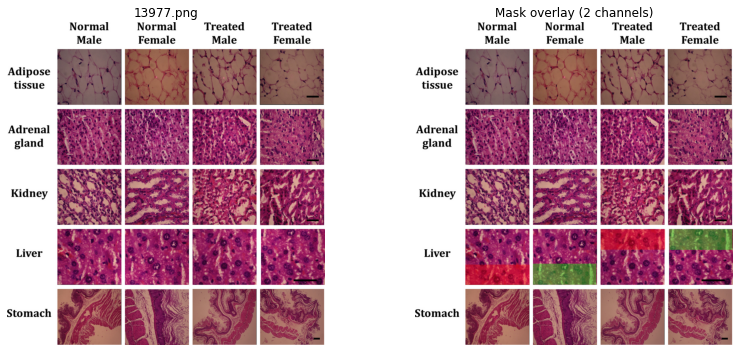

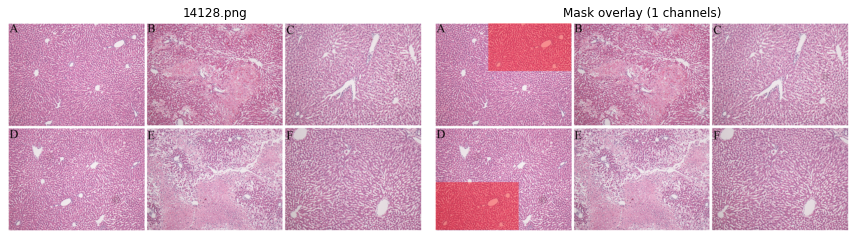

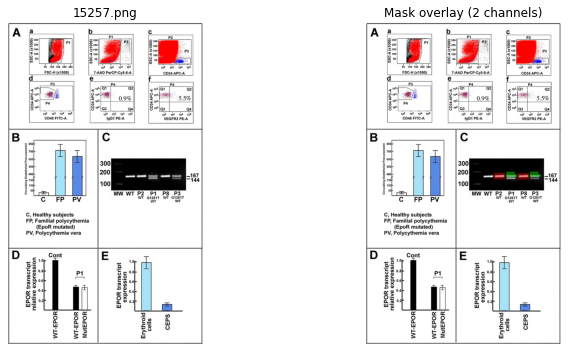

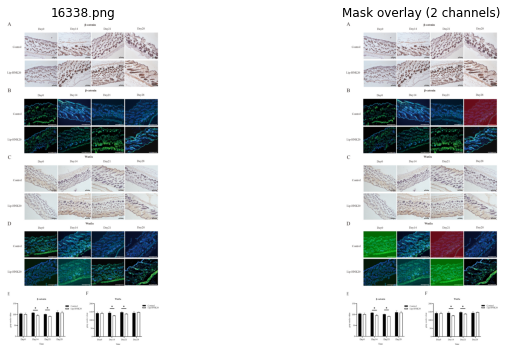

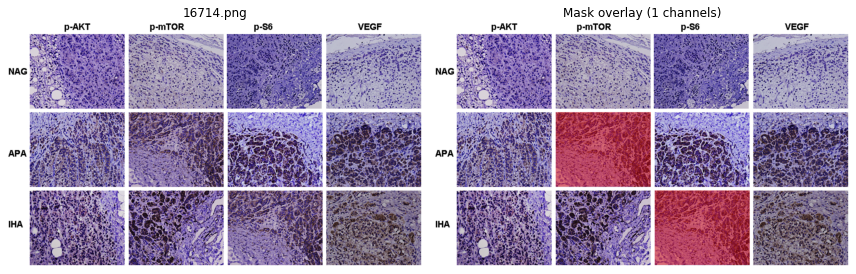

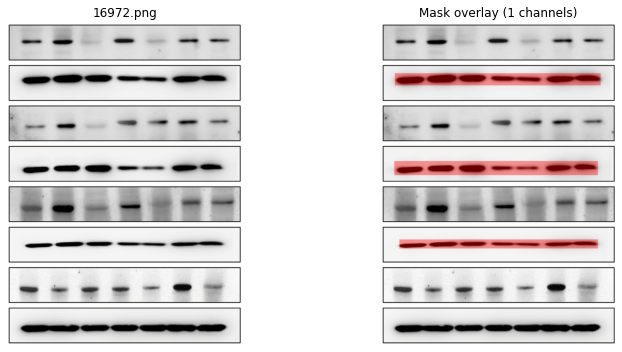

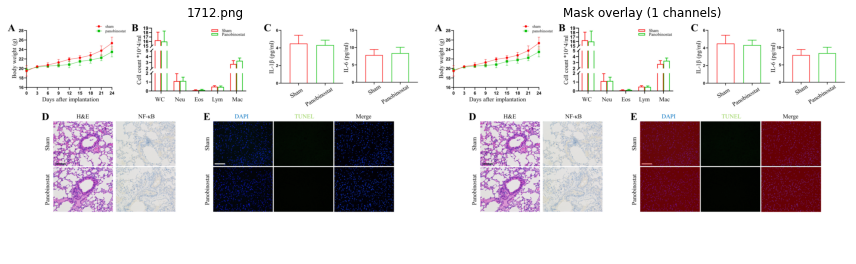

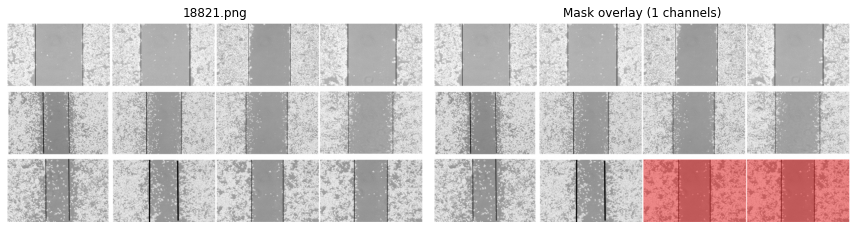

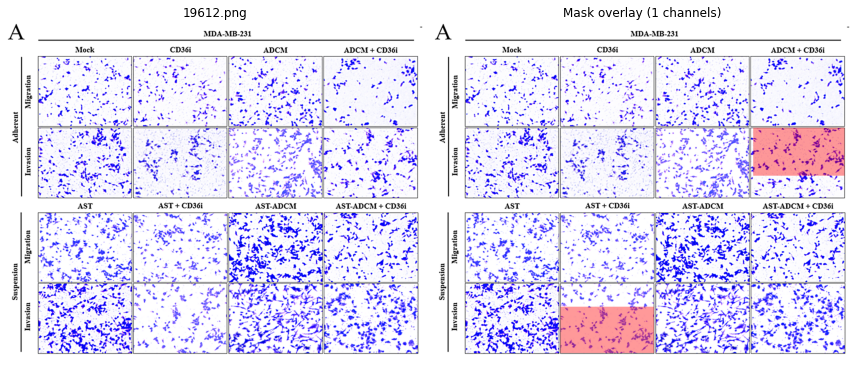

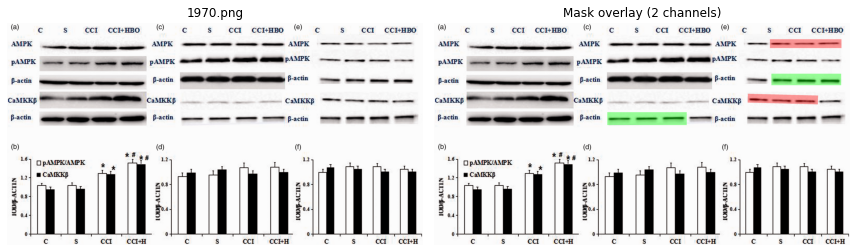

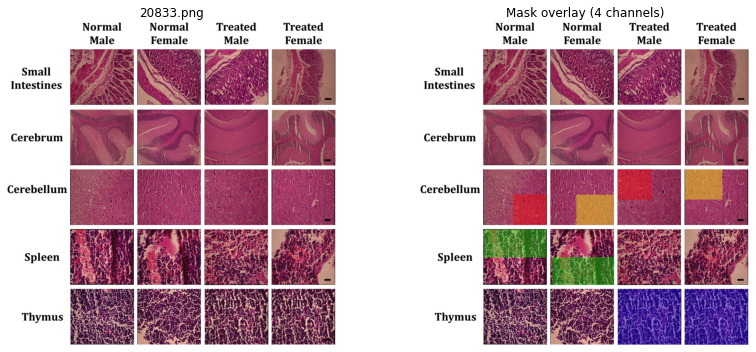

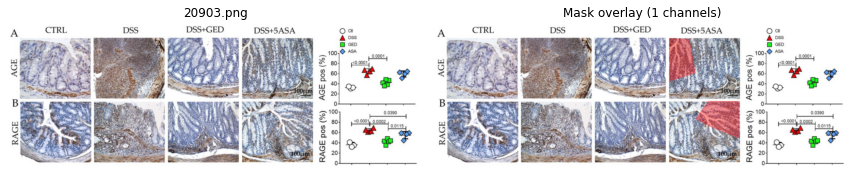

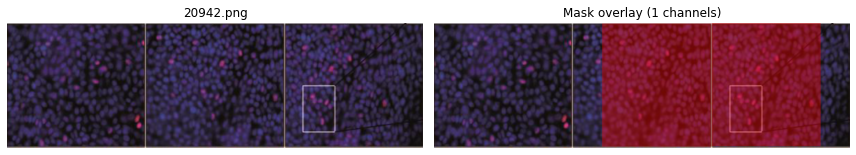

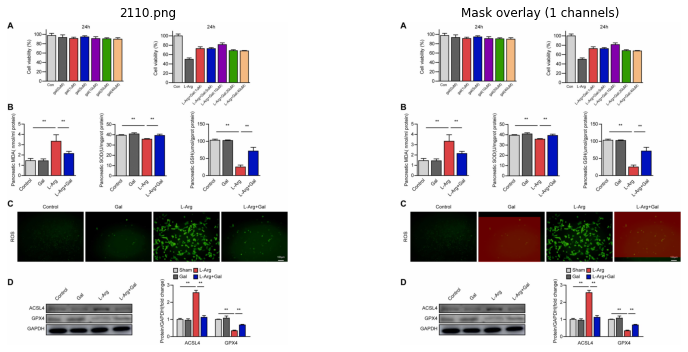

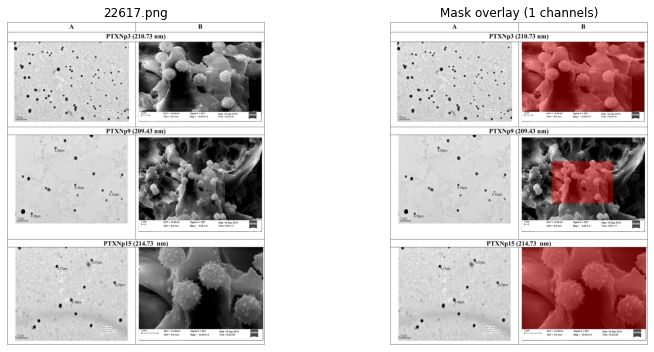

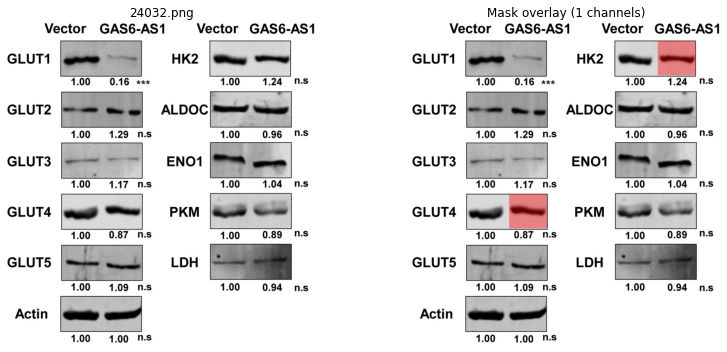

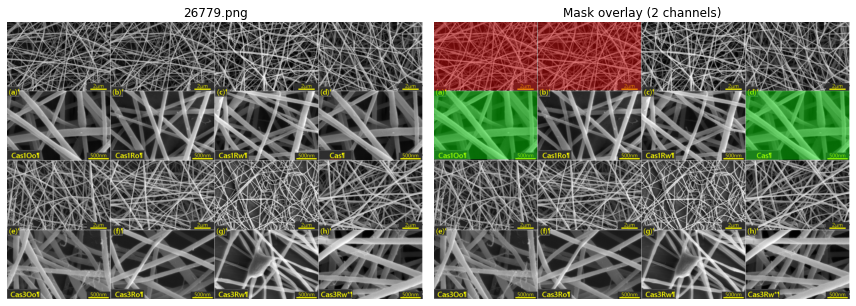

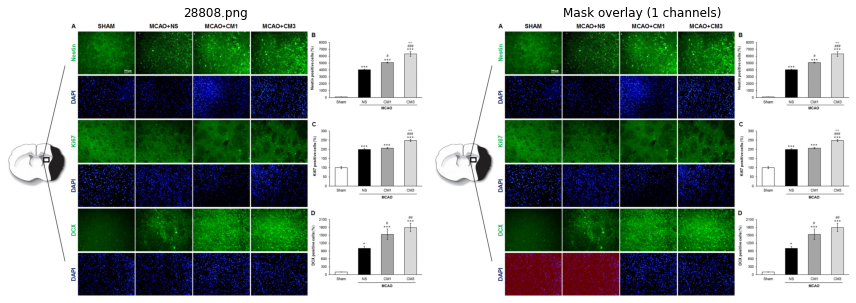

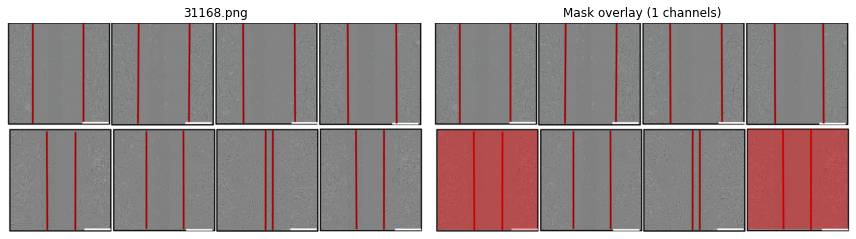

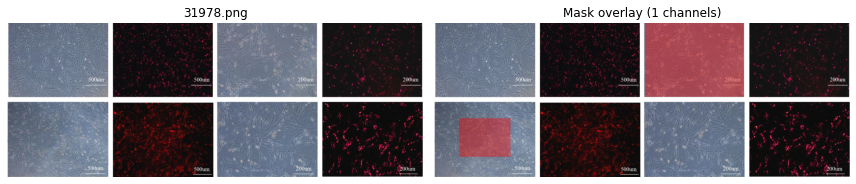

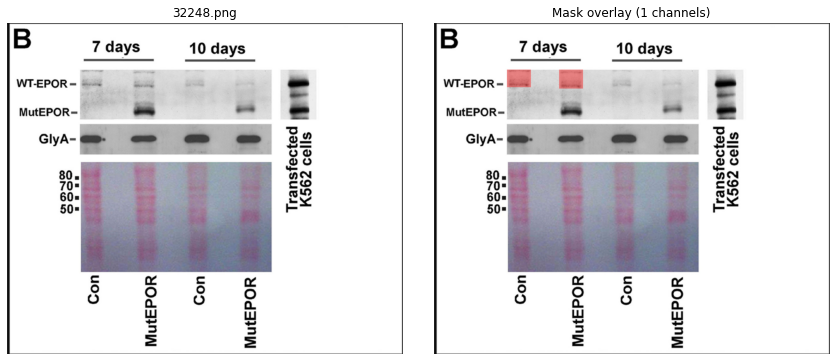

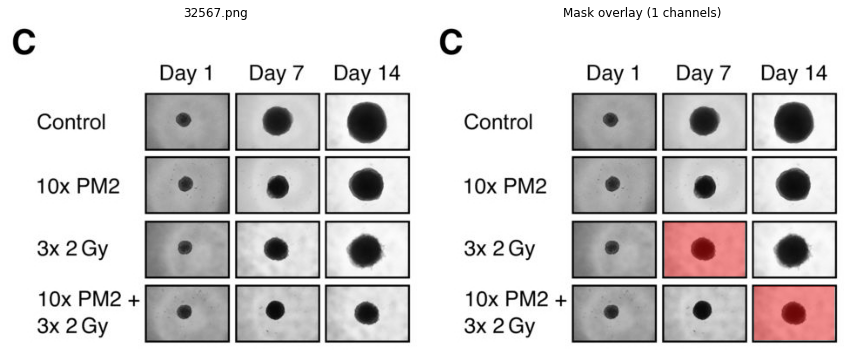

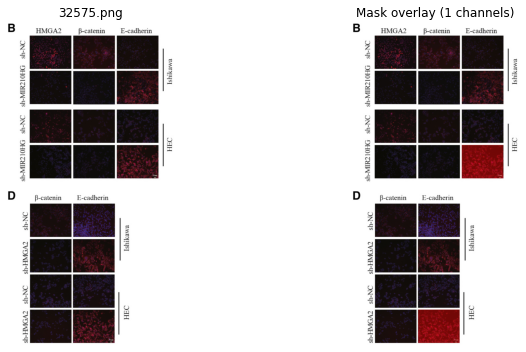

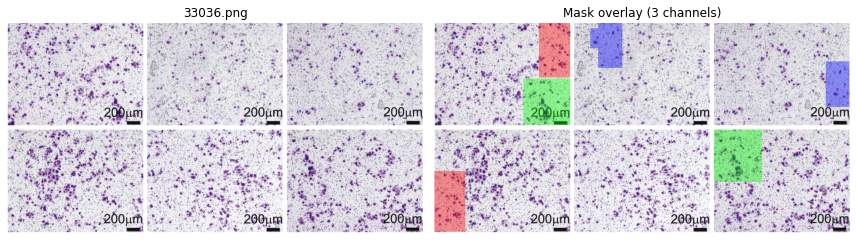

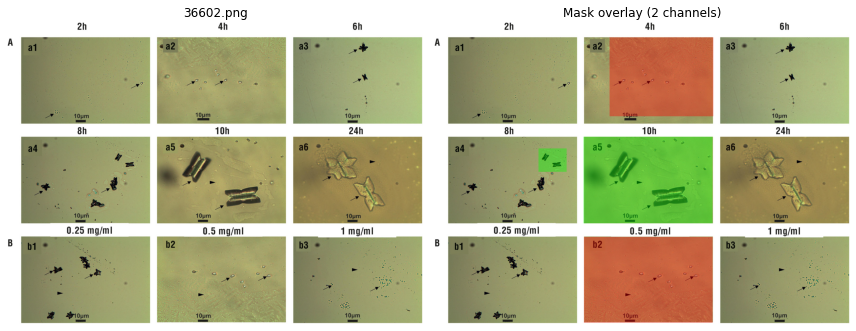

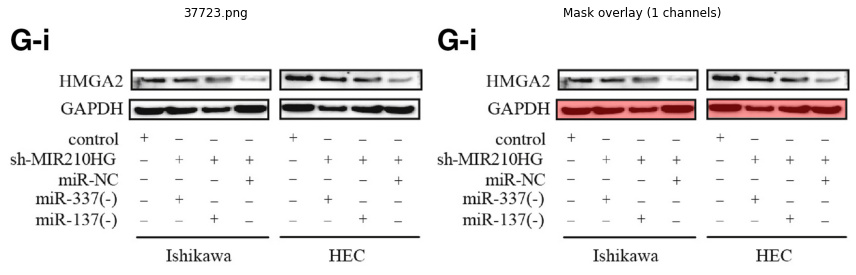

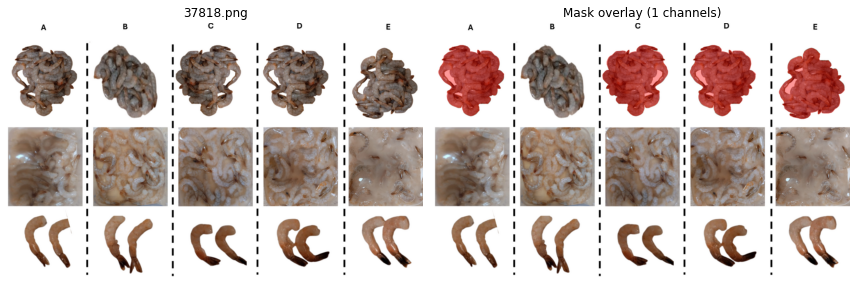

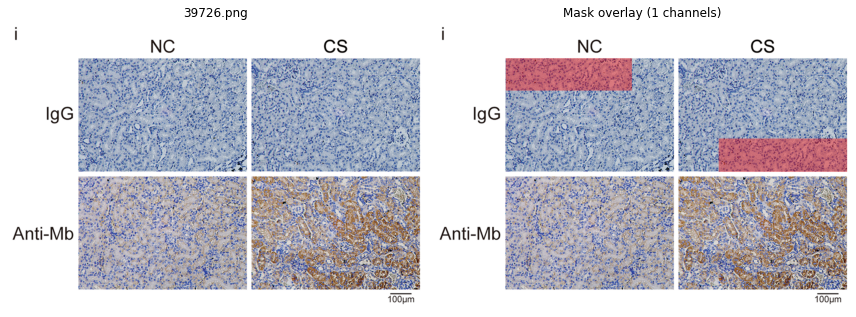

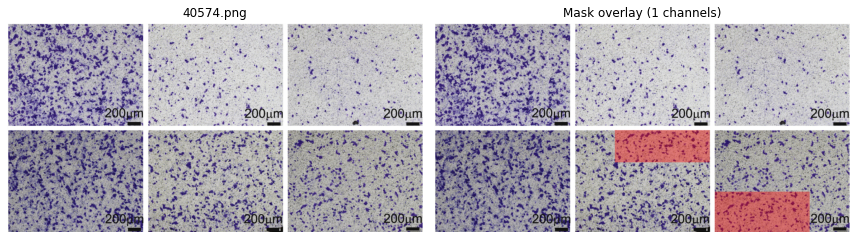

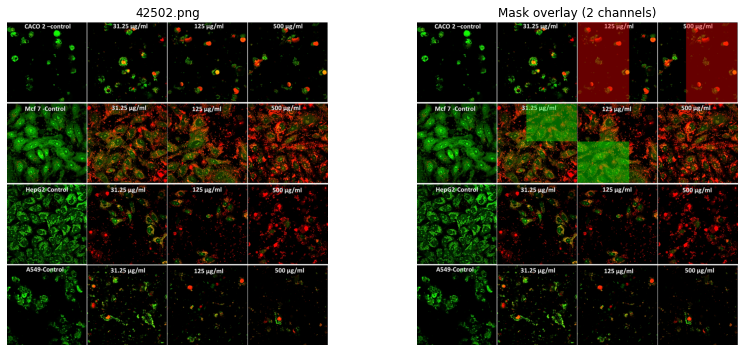

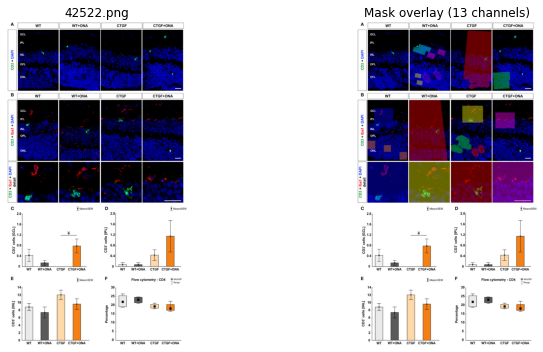

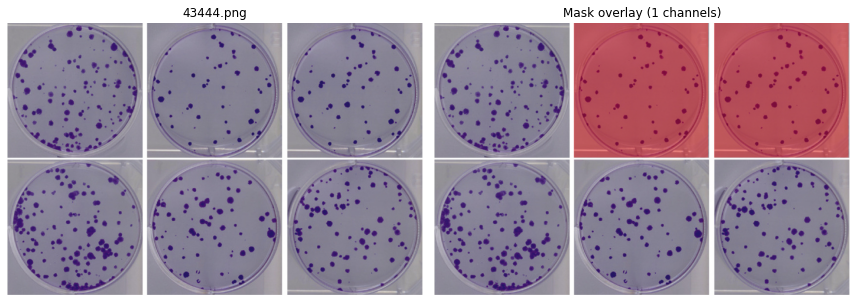

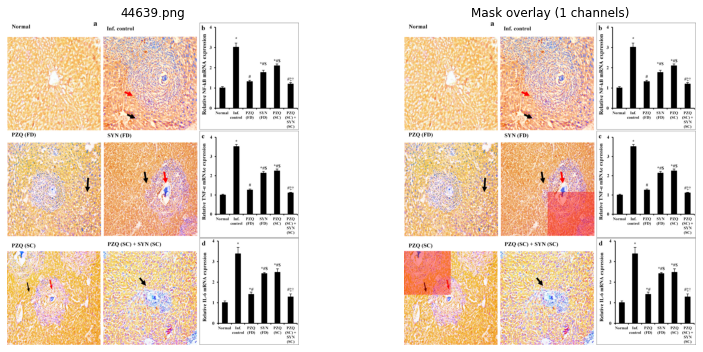

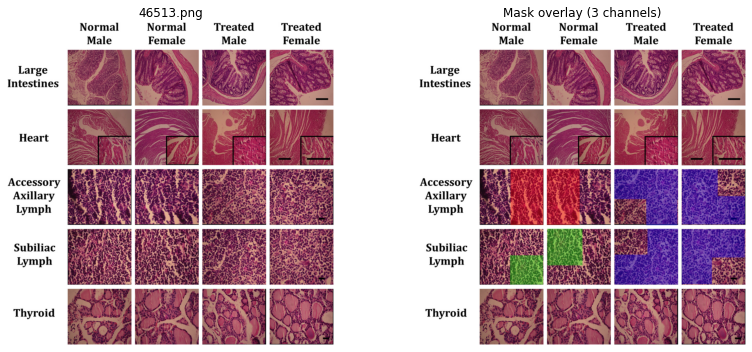

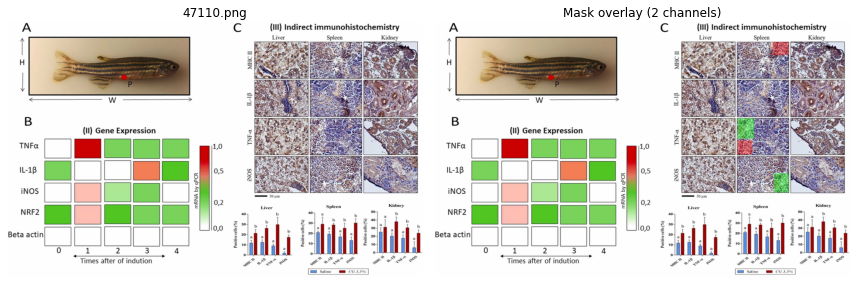

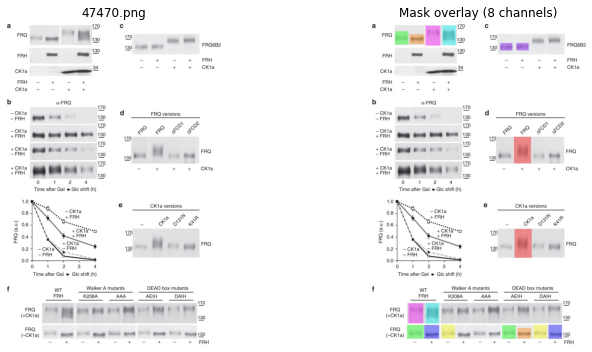

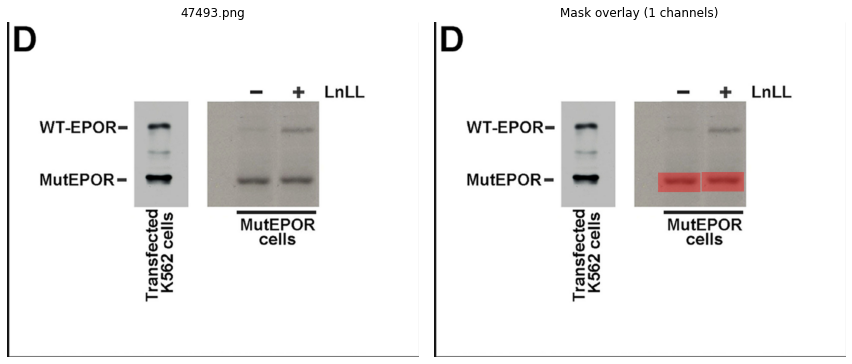

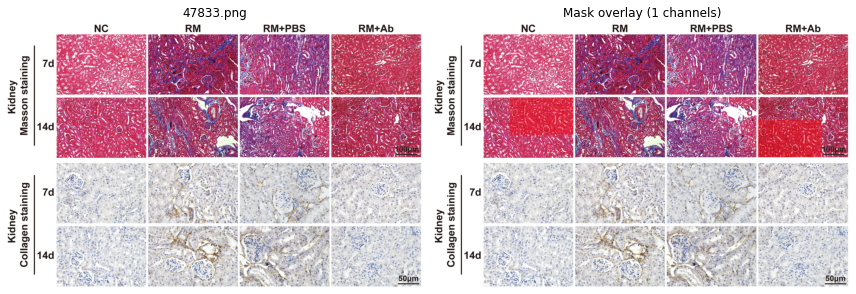

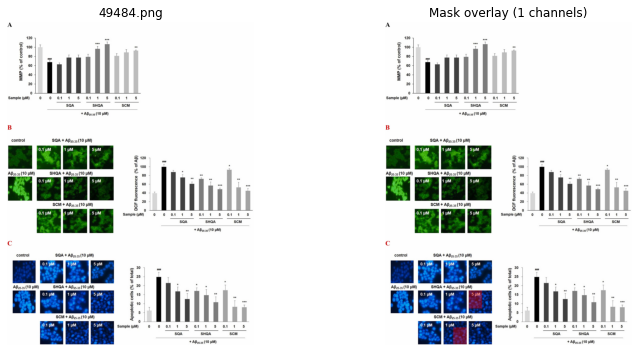

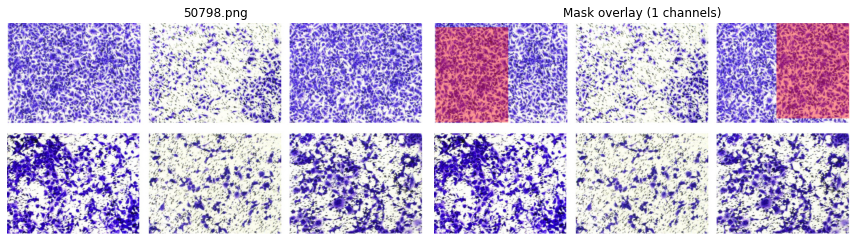

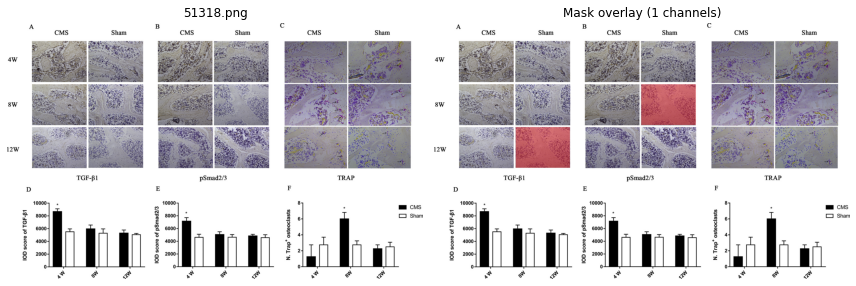

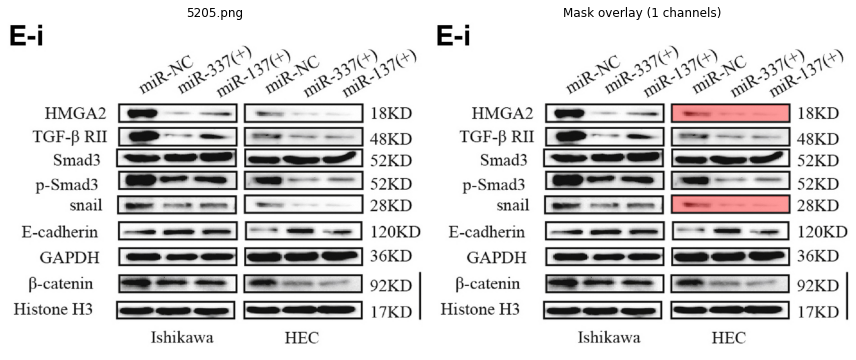

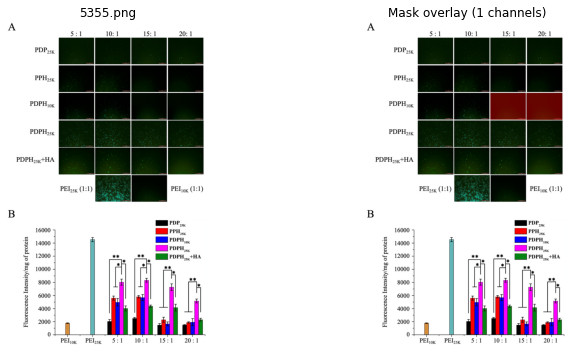

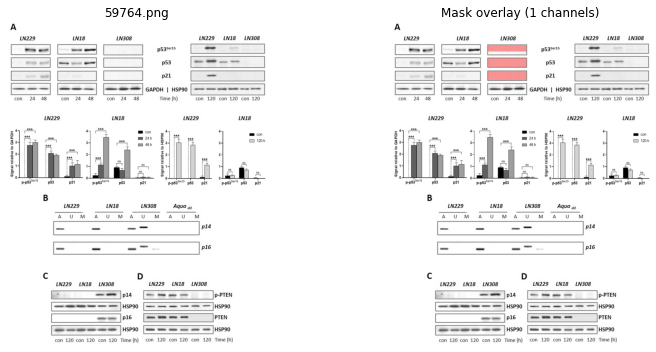

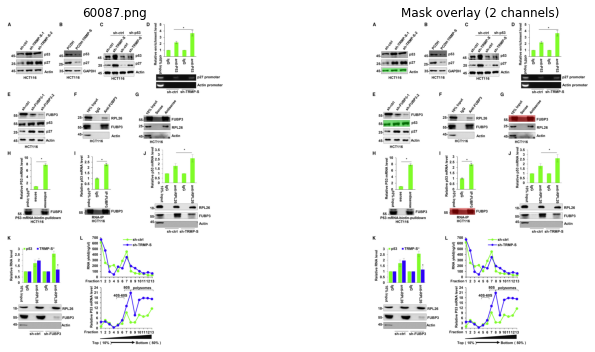

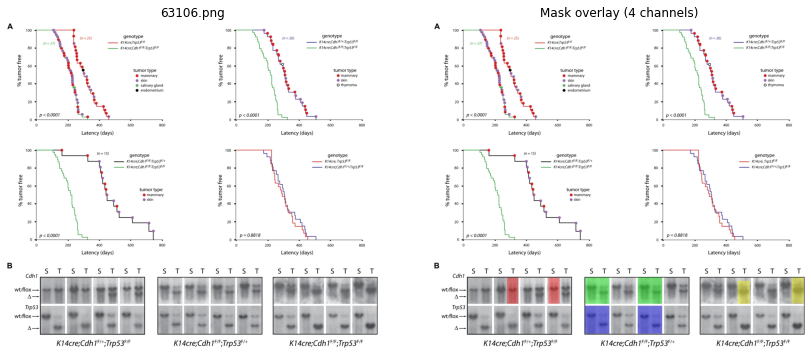

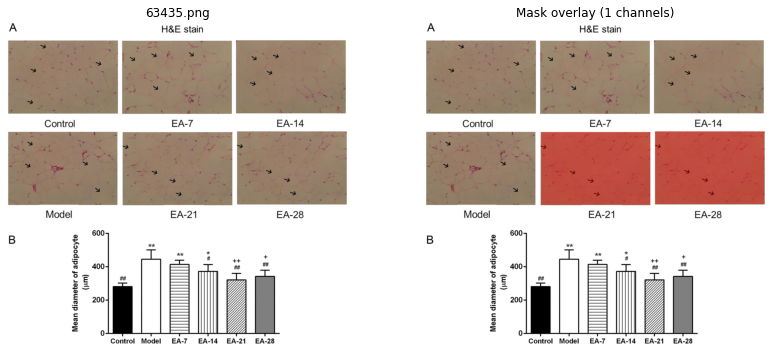

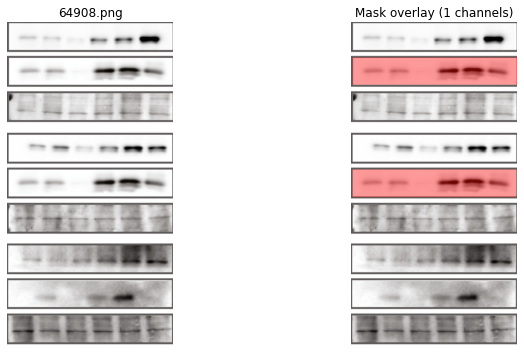

In [4]:
# Display all images with and without mask overlay
for img_file in image_files:
    name = os.path.splitext(img_file)[0]
    img_path = os.path.join(IMAGES_DIR, img_file)
    
    # Find matching .npy mask
    mask_path = os.path.join(MASKS_DIR, name + '.npy')
    if not os.path.exists(mask_path):
        mask_path = None
    
    img = Image.open(img_path).convert("RGB")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original image
    axes[0].imshow(img)
    axes[0].set_title(f"{img_file}")
    axes[0].axis("off")
    
    # Image with mask overlay
    if mask_path:
        mask = load_mask(mask_path)
        overlayed = overlay_masks(img, mask, MASK_OPACITY)
        axes[1].imshow(overlayed)
        axes[1].set_title(f"Mask overlay ({mask.shape[0]} channels)")
    else:
        axes[1].imshow(img)
        axes[1].set_title("No mask found")
    axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()
